In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
df["Country"].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [11]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [14]:
#understanding/findin out each customers rec , freq and monetary values



#recenccy
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Reference date for recency
day = pd.to_datetime("2012-01-01")

# Recency calculation
recency = df.groupby("CustomerID").agg(
    {"InvoiceDate": lambda x: (day - x.max()).days}
)
recency.columns = ["Recency"]

print(recency.head())



            Recency
CustomerID         
12346.0         347
12347.0          24
12348.0          97
12349.0          40
12350.0         332


,Recency
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
12352.0,58
12353.0,226
12354.0,254
12355.0,236


In [16]:
#frequency


freq = df.drop_duplicates(subset="InvoiceNo").groupby("CustomerID")[["InvoiceNo"]].count()
freq.columns = ["Frequency"]
freq.head(5)


,Frequency
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


,Recency
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
12352.0,58
12353.0,226
12354.0,254
12355.0,236


In [17]:
#monetary



df["total"]=df["Quantity"]*df["UnitPrice"]

In [18]:
money=df.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [21]:
RFM=pd.concat([recency,freq,money], axis=1)
recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]
RFM

,Recency,Frequency,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)


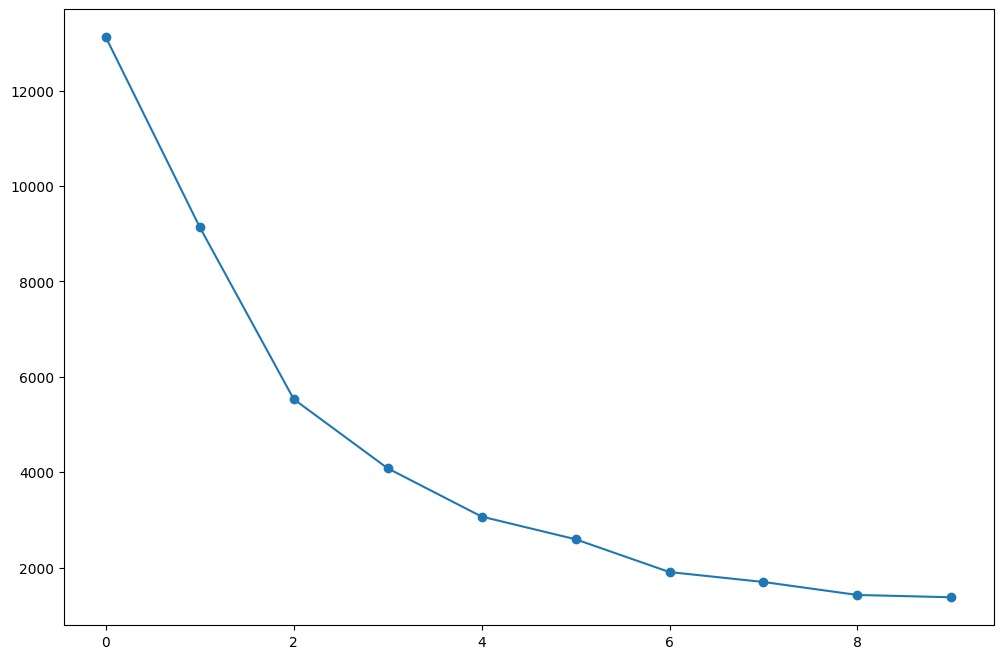

In [23]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")





In [24]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [25]:
RFM

,Recency,Frequency,total,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,4310.00,2
12348.0,97,4,1797.24,2
12349.0,40,1,1757.55,2
12350.0,332,1,334.40,1
...,...,...,...,...
18280.0,299,1,180.60,1
18281.0,202,1,80.82,1
18282.0,29,3,176.60,2


In [29]:
final = RFM.groupby("Clusters")[["Recency", "Frequency", "total"]].mean().reset_index()
final

,Clusters,Recency,Frequency,total
0,1,267.622744,1.852888,460.359902
1,2,61.562693,5.549722,1795.818707
2,3,27.346154,83.346154,75966.387308


In [30]:
def func(row):
    if row["Clusters"]==1:
        return 'Whales'
    elif row["Clusters"]==2:
        return 'Lapsed Cx'
    else:
        return 'Avg. Cx'

In [31]:
RFM['group']=RFM.apply(func, axis=1)

In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,1,77183.60,1,Whales
12347.0,61,7,4310.00,3,Avg. Cx
12349.0,40,1,1757.55,3,Avg. Cx
12350.0,332,1,334.40,2,Lapsed Cx
12352.0,94,8,2506.04,3,Avg. Cx
...,...,...,...,...,...
18280.0,181,1,180.60,2,Lapsed Cx
18281.0,25,1,80.82,3,Avg. Cx
18282.0,237,2,178.05,2,Lapsed Cx


In [32]:
result=RFM.group.value_counts()

In [33]:
result

group
Lapsed Cx    3238
Whales       1108
Avg. Cx        26
Name: count, dtype: int64

<Axes: ylabel='group'>

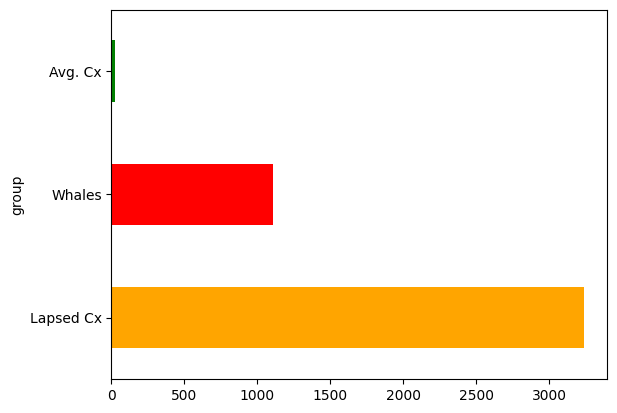

In [34]:
result.plot(kind="barh", color=["Orange","Red","Green"])